In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import arviz as az
import xarray as xr

In [13]:
def compute_mcmc_statistics(mcmc_chains, sample_index):
  num_chains = len(mcmc_chains)
  chain_length = mcmc_chains[0].shape[0]
  chains_array = np.array([mcmc_chains[i][:, sample_index] for i in range(num_chains)]) # re-arrange mcmc chains
  chains_dataset = xr.Dataset(
      {"posterior": (("chain", "draw"), chains_array)},
      coords={"chain": np.arange(num_chains), "draw": np.arange(chain_length)}
  )
  inference_data = az.InferenceData(posterior=chains_dataset)
  return az.rhat(inference_data)['posterior'].values, az.ess(inference_data)['posterior'].values

2.63319671489923


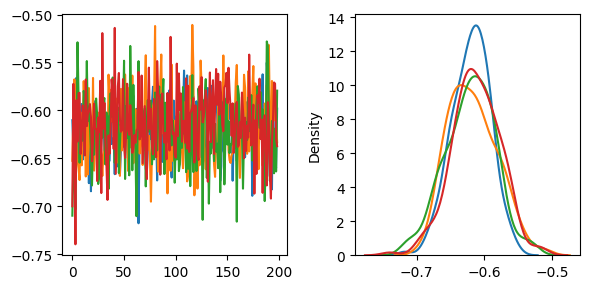

In [18]:
kernel_data = np.load(f'./results/run-0002/kernel/data_chain_{0}.npz')
print(kernel_data['test_mnll'])
sample = 3
fig, axs = plt.subplots(1, 2, figsize=(6,3))
for chain in [0, 1, 2, 3]:
    y_mean = np.load(f'results/run-0002/kernel/data_chain_{chain}.npz')['test_predictions'].squeeze()[:,sample]
    n_iters = y_mean.shape[0]
    sns.lineplot(x=np.arange(n_iters), y=y_mean,  ax=axs[0])
    sns.kdeplot(x=y_mean, ax=axs[1])

plt.tight_layout()
plt.show()

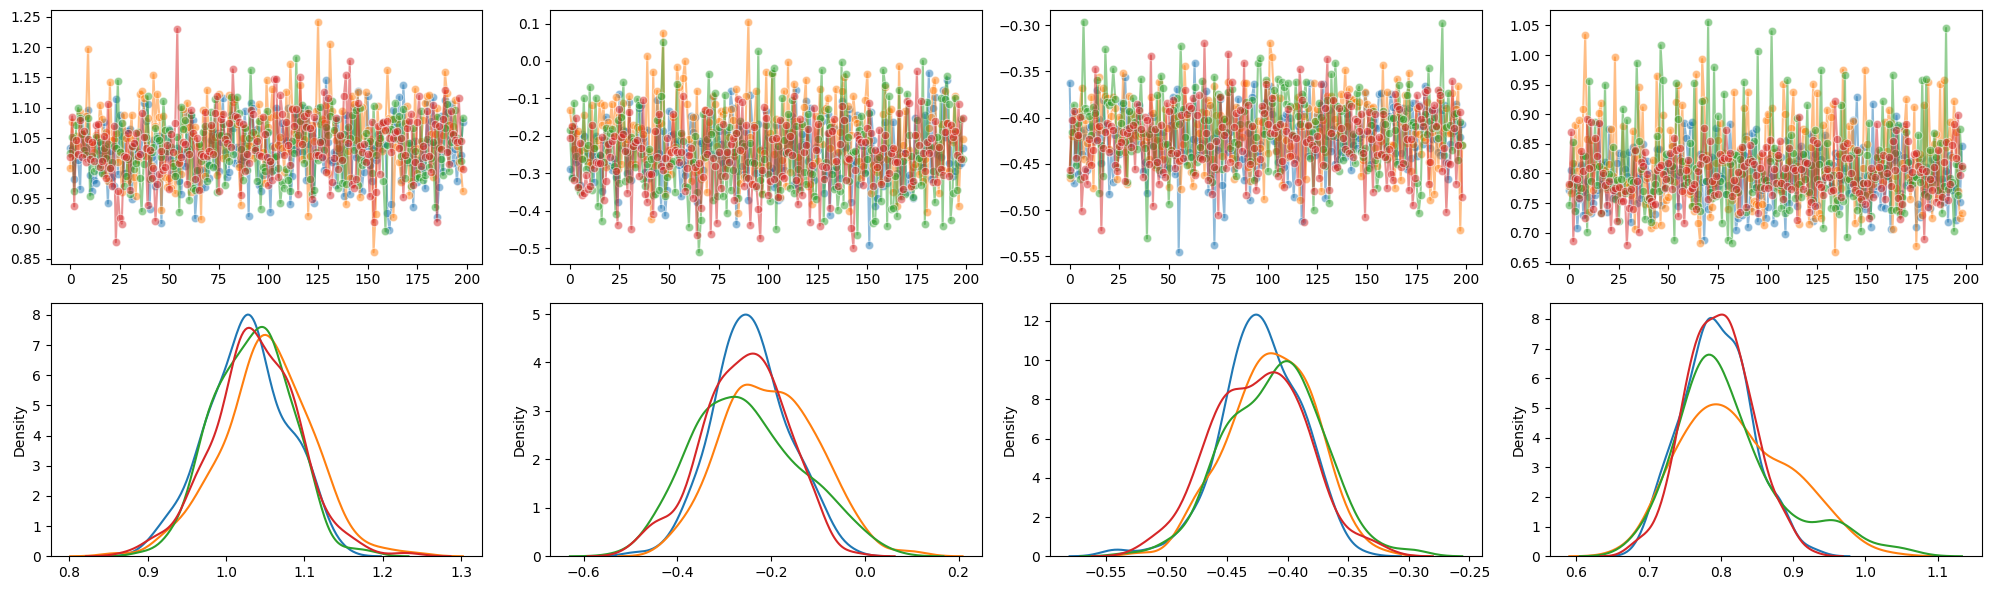

In [19]:
# 61, 62, 64
num_chains = 4
samples_idx = [50, 39, 21, 13]
fig, axs = plt.subplots(2, len(samples_idx), figsize=(len(samples_idx)*5, 6))
for chain in range(num_chains):
    y_mean = np.load(f'results/run-0002/kernel/data_chain_{chain}.npz')['test_predictions'].squeeze()
    for plot_idx, sample in enumerate(samples_idx):
        sns.lineplot(x=np.arange(y_mean.shape[0]), y=y_mean[:,sample], ax=axs[0,plot_idx], alpha=.5, marker='o')
        sns.kdeplot(x=y_mean[:,sample],  ax=axs[1,plot_idx])
        #axs[1,plot_idx].set_xlim([-2,2])

plt.tight_layout()
plt.show()

In [21]:
chain_0 = np.load(f'results/run-0002/kernel/data_chain_{0}.npz')['test_predictions'].squeeze()
chain_1 = np.load(f'results/run-0002/kernel/data_chain_{1}.npz')['test_predictions'].squeeze()
chain_2 = np.load(f'results/run-0002/kernel/data_chain_{2}.npz')['test_predictions'].squeeze()
chain_3 = np.load(f'results/run-0002/kernel/data_chain_{3}.npz')['test_predictions'].squeeze()
rhat_list = []
ess_list = []
for sample_index in range(99):
  rhat, ess = compute_mcmc_statistics([chain_0, chain_1, chain_2], sample_index)
  rhat_list.append(rhat)
  ess_list.append(ess)
  #print(f'sample {sample_index}: rhat={rhat} ess={ess}')
print(f'average rhat={np.mean(rhat_list)}, average ess={np.mean(ess_list)}')

average rhat=1.0115592500692967, average ess=540.5855786010235


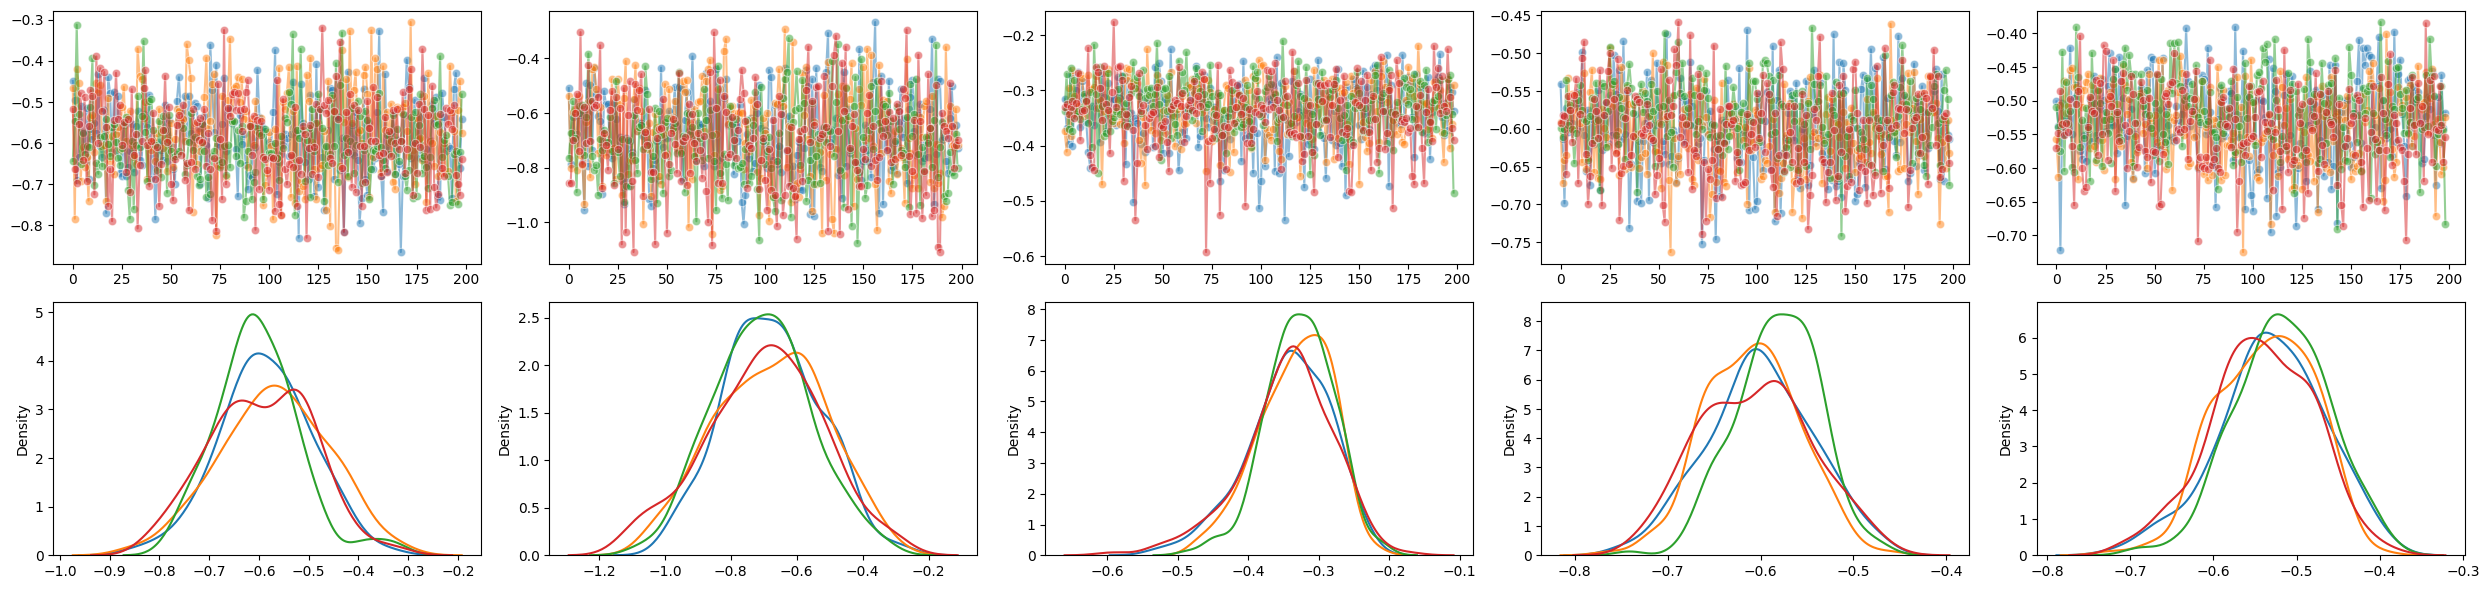

In [26]:
# FOLDER 41
num_chains = 4
samples_idx = [0, 1, 2, 3, 4]
fig, axs = plt.subplots(2, len(samples_idx), figsize=(len(samples_idx)*5, 6))
for chain in range(num_chains):
    y_mean = np.load(f'results/run-0041/kernel/data_chain_{chain}.npz')['test_predictions'].squeeze()
    for plot_idx, sample in enumerate(samples_idx):
        sns.lineplot(x=np.arange(199), y=y_mean[:,sample], ax=axs[0,plot_idx], alpha=.5, marker='o')
        sns.kdeplot(x=y_mean[:,sample],  ax=axs[1,plot_idx])

plt.tight_layout()
plt.show()

In [1]:
chain_0 = np.load(f'results/run-0041/kernel/data_chain_{0}.npz')['test_predictions'].squeeze()
chain_1 = np.load(f'results/run-0041/kernel/data_chain_{1}.npz')['test_predictions'].squeeze()
chain_2 = np.load(f'results/run-0041/kernel/data_chain_{2}.npz')['test_predictions'].squeeze()
chain_3 = np.load(f'results/run-0041/kernel/data_chain_{3}.npz')['test_predictions'].squeeze()
rhat_list = []
ess_list = []
for sample_index in range(99):
  rhat, ess = compute_mcmc_statistics([chain_0, chain_1, chain_2, chain_3], sample_index)
  rhat_list.append(rhat)
  ess_list.append(ess)
  #print(f'sample {sample_index}: rhat={rhat} ess={ess}')
print(f'average rhat={np.mean(rhat_list)}, average ess={np.mean(ess_list)}')

NameError: name 'np' is not defined

<Axes: >

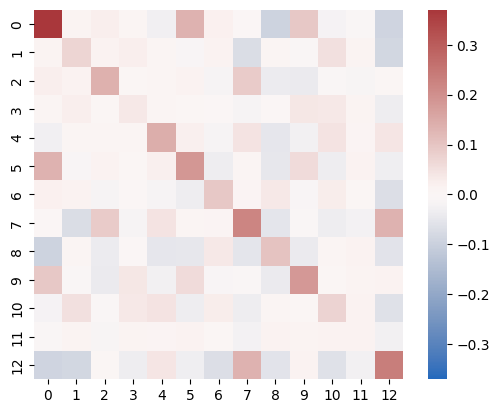

In [8]:
# Read samples KFOLD (no PCA)
k = 2
kernel_data = np.load(f'results/run-0005/kernel/kernel_samples_fold_{k}.npz')
D = kernel_data['D']
num_samples = kernel_data['kern.L'].shape[0]
precision_samples = np.empty((num_samples, D, D)) # S x D x D
for s in  range(num_samples):
    L =  fill_triangular(kernel_data['kern.L'][s], D) 
    precision = L @ L.T
    precision_samples[s] = precision
precision_mean = np.mean(precision_samples, axis=0) # D x D
precision_std = np.std(precision_samples, axis=0) # D x D
sns.heatmap(precision_mean, cmap='vlag', vmin=-np.max(precision_mean), center=0, vmax=np.max(precision_mean), square=True, cbar=True)

In [6]:
# Read samples PCA
k = 0
kernel_data = np.load(f'results/run-0006/kernel/kernel_samples_fold_{k}.npz')
D = kernel_data['Pd'].shape[0]
K = kernel_data['Pd'].shape[1]
num_samples = kernel_data['kern.L'].shape[0]
precision_samples = np.empty((num_samples, D, D)) # S x D x D
for s in  range(num_samples):
    L =  fill_triangular(kernel_data['kern.L'][s], K) 
    Pd = kernel_data['Pd']
    precision = L @ L.T
    precision_samples[s] = Pd @ precision @ Pd.T
precision_mean = np.mean(precision_samples, axis=0) # D x D
precision_std = np.std(precision_samples, axis=0) # D x D
sns.heatmap(precision_mean, cmap='vlag', vmin=-np.max(precision_mean), center=0, vmax=np.max(precision_mean), square=True, cbar=True)

FileNotFoundError: [Errno 2] No such file or directory: 'results/run-0006/kernel/kernel_samples_fold_1.npz'